# Optimize the power conversion efficiency of organic photovoltaic solar cells

## Introduction

Organic photovoltaic (OPV) are ‘plastic’ solar cells that can be made cheaply and easily as you can use techniques like roll to roll printing, inject printing and spray coating. Current generation solar cells take several years of use before they payback the energy required in their manufacture, OPVs are so efficient that their energy payback is only 24hours. Power conversion efficiencies (PCEs) of OPVs are now around 14%. To commercialise them, we need to figure out how best to manufacture them.

Organic photovoltaic devices have a sandwich architecture. The bottom layers Al/Mg and LiF are the bottom electrode. The important part is the bulk hetereojunction, shown in red in the figure below, which comprises of a low band gap polymer which is the electron donor and fullerene which is the electron acceptor. Addition of an additive helps with forming and bridging separate nanodomains of donor and accceptor. Solar cells work by using light to form an exciton which then separates into an electron-hole pair and you want these to be separated from each other, which is why you want separate nanodomain of donor and acceptor. The top of the solar cell is PEDOT:PSS (a conducting polymer) and ITO  (indium tin oxide), a see-through electrode, which together act as the top electrode. 

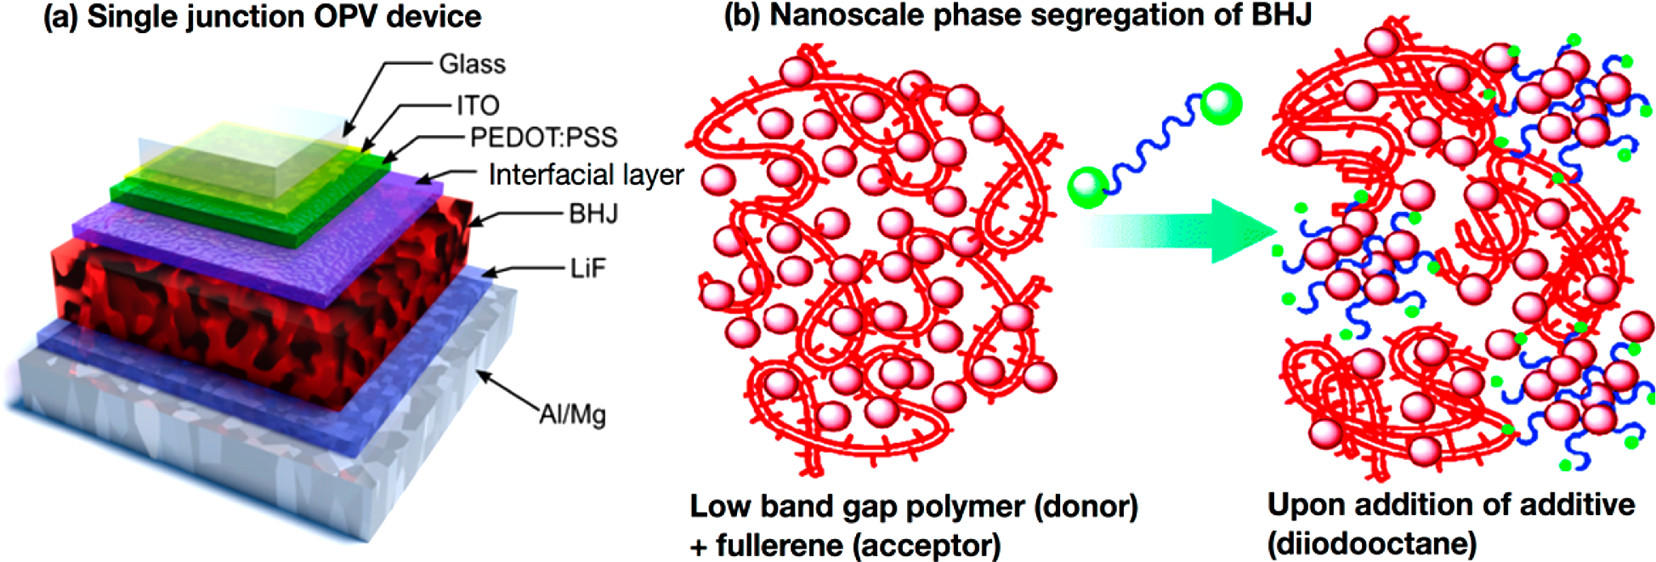

Figure 1. (a) Schematic of single junction organic photovoltaic (OPV) devices, showing the bulk heterojunction (BHJ; in red), and the multiple interfacial layers in the device. (b) Schematic of BHJ morphology: in this case, a low band gap polymer donor and a fullerene acceptor undergoing nanoscale phase segregation into discrete nanoscale domains of donor and acceptor. The use of an additive is often purported to assist in nanodomain formation, as shown here. Taken from [ACS Nano 2018, 12, 7434−7444]





## The task

The task is to optimise the construction of this type of solar cell. Donor weight percentage is a measure of the ratio of donor to acceptor in the heterojunction.  Total solution concentration is the concentration of the spin-coating solution. Bulk heterojunction spin-case speed is a measure of how fast you spin the device when coating it with the bulk heterojunction mixture. Processing additive is the amount of additive (diiodooctane) added to the mixture. The thickness of a spun film is determined by the spin speed, solvent vapour pressure and solution viscosity, as both the donor weight percentage and total solution concentration can affect viscosity, the first three factors can all affect the thickness of the final BHJ layer. The additive (diiodooctane) increases the drying time for the film, helping to separate the hetereojunction out into nanodomains of donor and acceptor rich areas. 


**Factors selected:**

| Name  |   Factors                         |Factor range   | No. of levels  |
|-------|-----------------------------------|---------------|----------------|
| Donor | Donor weight percentage          | 10-55 (wt %)         | 4       |
| Conc. | Total solution concentration     | 10-25 (mg/mL)        | 4       |
| Spin  | Bulk heterojunction spin-case speed | 600 - 3000  (rpm) | 4       |
| Add.  | Processing additive              |  0-12 (vol %)        | 4       | 

We shall use the shortened names from the table above. 

**Files: **

1. `solar_cells_1.csv` results from the first experiment, fractional factorial, 4 factors and 4 levels, here we have 16 experiments, one failed to solidify. 
2. `'solar_cells_2.csv'` has results from the second experiment, a fractional factorial, 3 factors and 3 levels. This covers a smaller range. 

The data is taken from: 
"How To Optimize Materials and Devices via Design of Experiments and Machine Learning: Demonstration Using Organic Photovoltaics", Bing Cao, Lawrence A. Adutwum, Anton O. Oliynyk, Erik J. Luber, Brian C. Olsen, Arthur Mar, and Jillian M. Buriak, ACS Nano 2018, 12, 7434−7444

### First we import our packages

In [1]:
# for dataframes
import pandas as pd

# for pictures
import matplotlib.pyplot as plt
# for maths
import numpy as np

## Some code in doenut needs updating, so use this to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import doenut

## Read in the first experiment's data

In [2]:
df=pd.read_csv('solar_cells_1.csv')
df

experiment # donor percentage total concentration spin speed additive  \
0           NaN           % (wt)               mg/mL        rpm    vol %   
1           1-1               10                  20       3000        2   
2           1-2               10                  25       1000        8   
3           1-3               10                  10        600        0   
4           1-4               10                  15       2000       12   
5           1-5               25                  20        600       12   
6           1-6               25                  15       1000        2   
7           1-7               25                  10       3000        8   
8           1-8               25                  25       2000        0   
9           1-9               40                  10       1000       12   
10         1-10               40                  20       2000        8   
11         1-11               40                  25        600        2   
12         1-12               40                  15       3000        0   
13         1-13               55                  10       2000        2   
14         1-14               55                  15        600        8   
15         1-15               55                  20       1000        0   
16         1-16               55                  25       3000       12   

        PCE  std of PCE (%)  number of devices  
0         %             NaN                NaN  
1      0.05             5.0               14.0  
2      3.24            11.0               10.0  
3     0.016            16.0               14.0  
4    0.0004             4.0               10.0  
5      7.14            13.0                8.0  
6      3.22            32.0                8.0  
7   0.00033             7.0               14.0  
8      7.21            17.0               11.0  
9      1.85             5.0                3.0  
10     6.16            28.0               12.0  
11      3.9             8.0               11.0  
12     2.27            35.0                9.0  
13     1.16             4.0                3.0  
14     3.18            12.0               10.0  
15     3.89            10.0               13.0  
16      NaN             NaN                NaN

### Set up input and response dataframes

We must drop the last experiment, as these devices didn't set.

In [3]:
inputs = pd.DataFrame({
    'Donor %': [float(x) for x in df.iloc[1:-1,1]],
    'Conc.': [float(x) for x in df.iloc[1:-1,2]],
    'Spin': [float(x) for x in df.iloc[1:-1,3]],
    'Add.': [float(x) for x in df.iloc[1:-1,4]]})
inputs

Donor %  Conc.    Spin  Add.
0      10.0   20.0  3000.0   2.0
1      10.0   25.0  1000.0   8.0
2      10.0   10.0   600.0   0.0
3      10.0   15.0  2000.0  12.0
4      25.0   20.0   600.0  12.0
5      25.0   15.0  1000.0   2.0
6      25.0   10.0  3000.0   8.0
7      25.0   25.0  2000.0   0.0
8      40.0   10.0  1000.0  12.0
9      40.0   20.0  2000.0   8.0
10     40.0   25.0   600.0   2.0
11     40.0   15.0  3000.0   0.0
12     55.0   10.0  2000.0   2.0
13     55.0   15.0   600.0   8.0
14     55.0   20.0  1000.0   0.0

In [4]:
responses = pd.DataFrame({'PCE':  [float(x) for x in df['PCE'][1:-1]]})
responses

PCE
0   0.05000
1   3.24000
2   0.01600
3   0.00040
4   7.14000
5   3.22000
6   0.00033
7   7.21000
8   1.85000
9   6.16000
10  3.90000
11  2.27000
12  1.16000
13  3.18000
14  3.89000

# Task 1. Create a linear (main factors only) model

Create a linear model, i.e. a model that has just the main effects (also known as a first order model or main effects model) Fit your linear model to the first experiment’s data and calculate R2 and Q2 for your fitted model. Then answer the questions.

In [5]:
# First create a dataset object linking the inputs and responses.
data_set = doenut.data.ModifiableDataSet(inputs, responses)

model = doenut.models.AveragedModel(data_set)

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")

Mean of test set: 2.885782
Mean being used: 2.885782
Sum of squares of the residuals (explained variance) is72.39485075244474
Sum of squares total (total variance) is 87.23748999604001
Q2 is 0.17
R2 is 0.6035441402865225, Q2 is 0.1701406040484318


# Task 2. Create a quadratic, parsimonious and hierarchical model

Task 2. Create a **quadratic**, **parsimonious** and **hierarchical** model. Starting with a quadratic model, and making sure that all models are hierarchical, optimise the model by removing **only** the **statistically insignificant** terms. Keep a note of the terms removed and teh $R^2$ and $Q^2$ values.

First we must expand the input dataframe to include the higher order terms.

In [6]:
sat_source_list = []
source_list = []
sat_inputs_orig, sat_source_list = doenut.add_higher_order_terms(
    inputs,
    add_squares=True,
    add_interactions=True,
    column_list=[])

Input array has columns ['Donor %', 'Conc.', 'Spin', 'Add.']
Adding square terms:
Donor %**2
Conc.**2
Spin**2
Add.**2
Adding interaction terms:
Donor %*Conc.
Donor %*Spin
Donor %*Add.
Conc.*Spin
Conc.*Add.
Spin*Add.


## Full saturated quadratic model:

This contains all the main terms and all the square terms.

Mean of test set: -0.19956059015183775
Mean being used: -0.19956059015183775
Sum of squares of the residuals (explained variance) is7.891834717116401
Sum of squares total (total variance) is 6.713243181897795
Q2 is -0.176
R2 is 0.8154639196458027, Q2 is -0.17556216917579692
Input_selector was: [0, 1, 2, 3, 4, 5, 6, 7]
Average coefficients are: [ 6.68270726  3.02883412  1.87771844 -0.72988262 -5.93271432 -1.89506711
 -2.58602063  0.69844306]
Errors are [2. 2. 2. 2. 2. 2. 2. 2.]
Coefficient labels are: ['Donor %', 'Conc.', 'Spin', 'Add.', 'Donor %**2', 'Conc.**2', 'Spin**2', 'Add.**2']


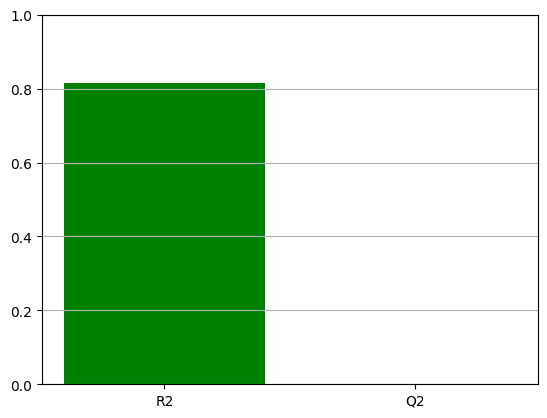

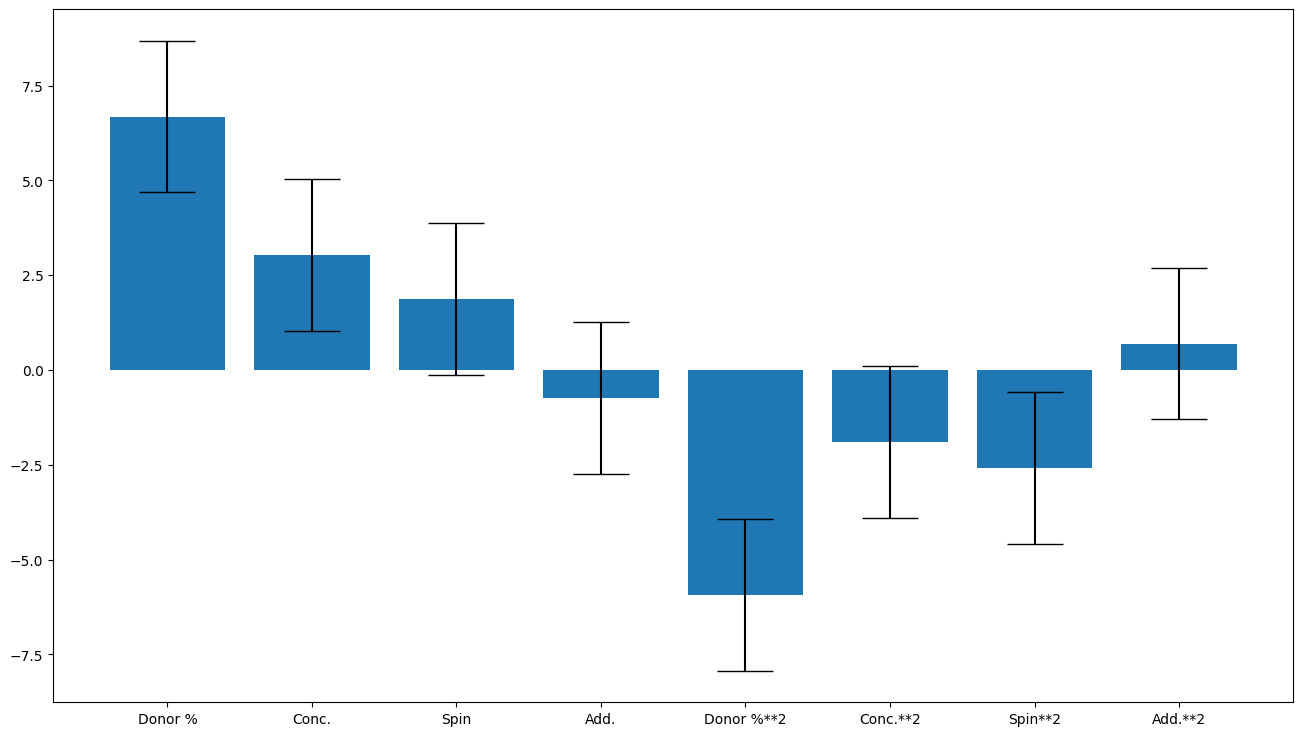

In [7]:
#This time we only want to select some columns and we want it to scale each column so the values are normalised
#across columns.
# First make a list of the columns we want
input_selector = ['Donor %', 'Conc.', 'Spin', 'Add.','Donor %**2', 'Conc.**2', 'Spin**2', 'Add.**2']
# Note we could also use list indices like this:
# input_selector = [0, 1, 2, 3, 4, 5, 6, 7]
dataset = doenut.data.ModifiableDataSet(sat_inputs_orig, responses).filter(input_selector).scale()

model = doenut.models.AveragedModel(dataset, scale_run_data=True, drop_duplicates="no")

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")
doenut.plot.plot_summary_of_fit_small(r2, q2)
doenut.plot.coeff_plot(model.coeffs, labels=list(dataset.get().inputs.columns), errors='p95', normalise=True)

Mean of test set: -0.19956059015183775
Mean being used: -0.19956059015183775
Sum of squares of the residuals (explained variance) is4.482190371663812
Sum of squares total (total variance) is 6.713243181897795
Q2 is 0.332
R2 is 0.8125619990778765, Q2 is 0.33233606317882225
Input_selector was: [0, 1, 2, 3, 4, 5]
Average coefficients are: [10.24376537  4.00601457  2.41963174 -9.66908521 -2.52406376 -3.51264286]
Errors are [2. 2. 2. 2. 2. 2.]
Coefficient labels are: ['Donor %', 'Conc.', 'Spin', 'Donor %**2', 'Conc.**2', 'Spin**2']


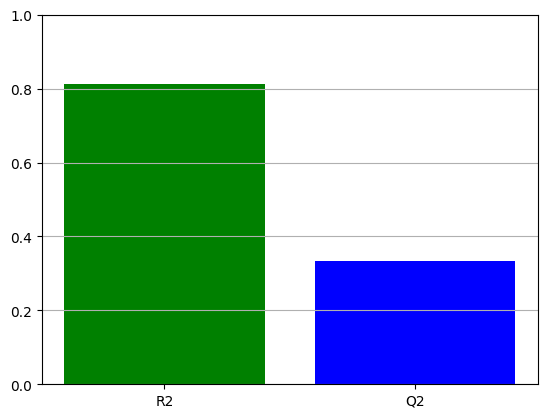

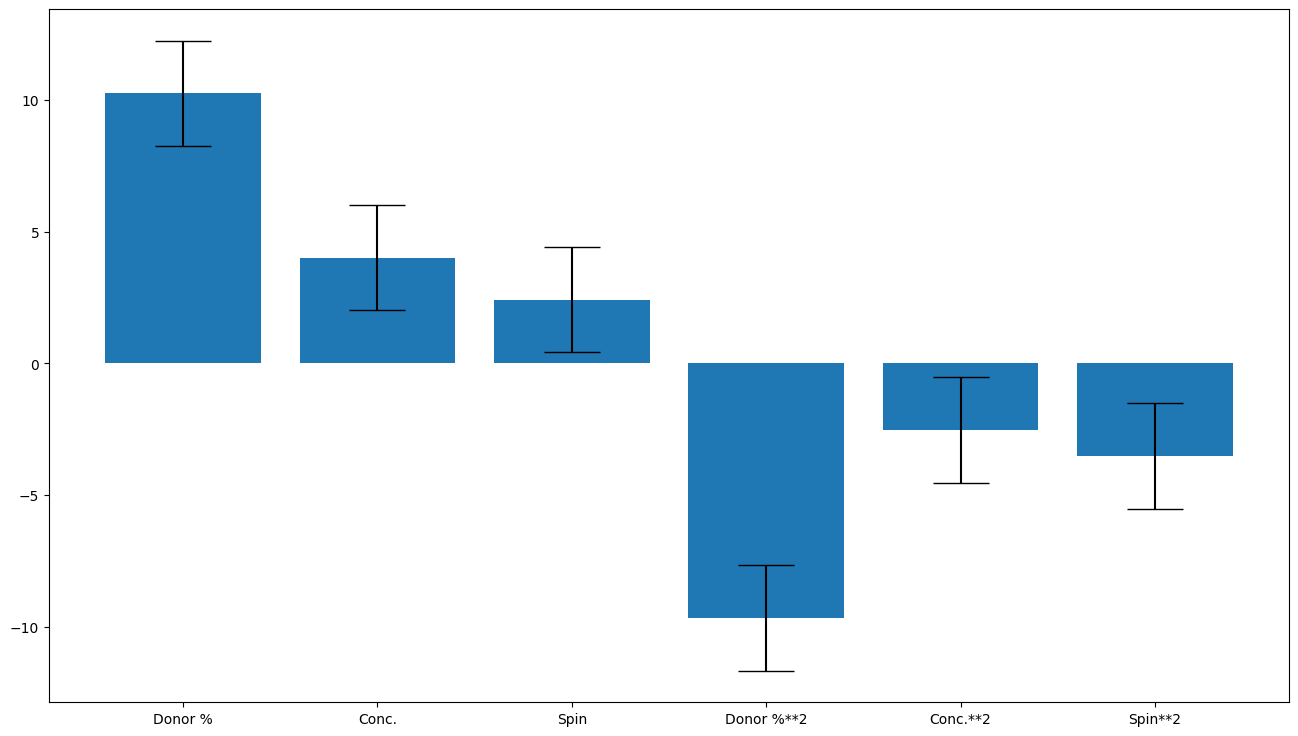

In [8]:
# That's not very good. Let's try with a different label selection, removing the most obviously insignificant terms
input_selector = [0, 1, 2,
                  4, 5, 6]
dataset = doenut.data.ModifiableDataSet(sat_inputs_orig, responses).filter(input_selector).scale()

model = doenut.models.AveragedModel(dataset, scale_run_data=True, drop_duplicates="no")

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")
doenut.plot.plot_summary_of_fit_small(r2, q2)
doenut.plot.coeff_plot(model.coeffs, labels=list(dataset.get().inputs.columns), errors='p95', normalise=True)

15 datapoints so 14 DoF.

Starting from quadratic model

| No. of terms | DoF   | term removed | factor removed | $R^2$  |  $Q^2$ |
|--------------|-------|--------------|----------------|--------|--------|
| 8            | 6     |              |                | 0.815  | -0.176 |
| 7            | 7     | 8            | `'Add.**2`     | 0.813  | 0.0863 |
| 6            | 8     | 3            | `Add.`         | 0.813  | 0.332  |

this is the model with no statistically insignificant terms. It's heirarchical. 

The Q2 is better than the main effects only model

## Task 3. Create a parsimonious interaction model

Create hierarchical parsimonious interaction model. Starting with a interaction model, and making sure that all models are hierarchical, optimise the model by removing only the statistically insignificant terms. Keep a note of the terms removed and the $Q^2$ and $R^2$ values.


Mean of test set: -0.19956059015183775
Mean being used: -0.19956059015183775
Sum of squares of the residuals (explained variance) is4.629808953304474
Sum of squares total (total variance) is 6.713243181897795
Q2 is 0.31
R2 is 0.7602214841545494, Q2 is 0.3103469027028969
Input_selector was: [0, 1, 2, 3, 4, 5]
Average coefficients are: [-4.40855184 12.50737559 -5.89083153 -2.40532637  6.88426335  6.80094347]
Errors are [2. 2. 2. 2. 2. 2.]
Coefficient labels are: ['Donor %', 'Conc.', 'Spin', 'Add.', 'Donor %*Spin', 'Donor %*Add.']


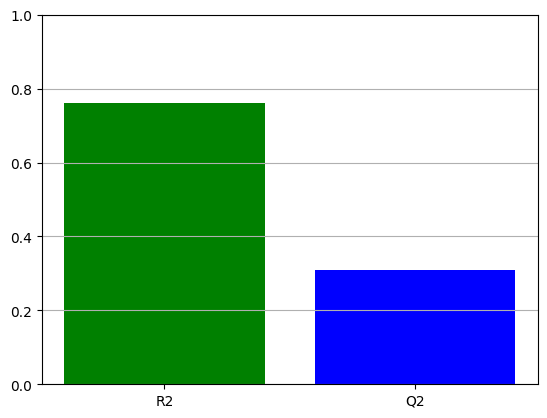

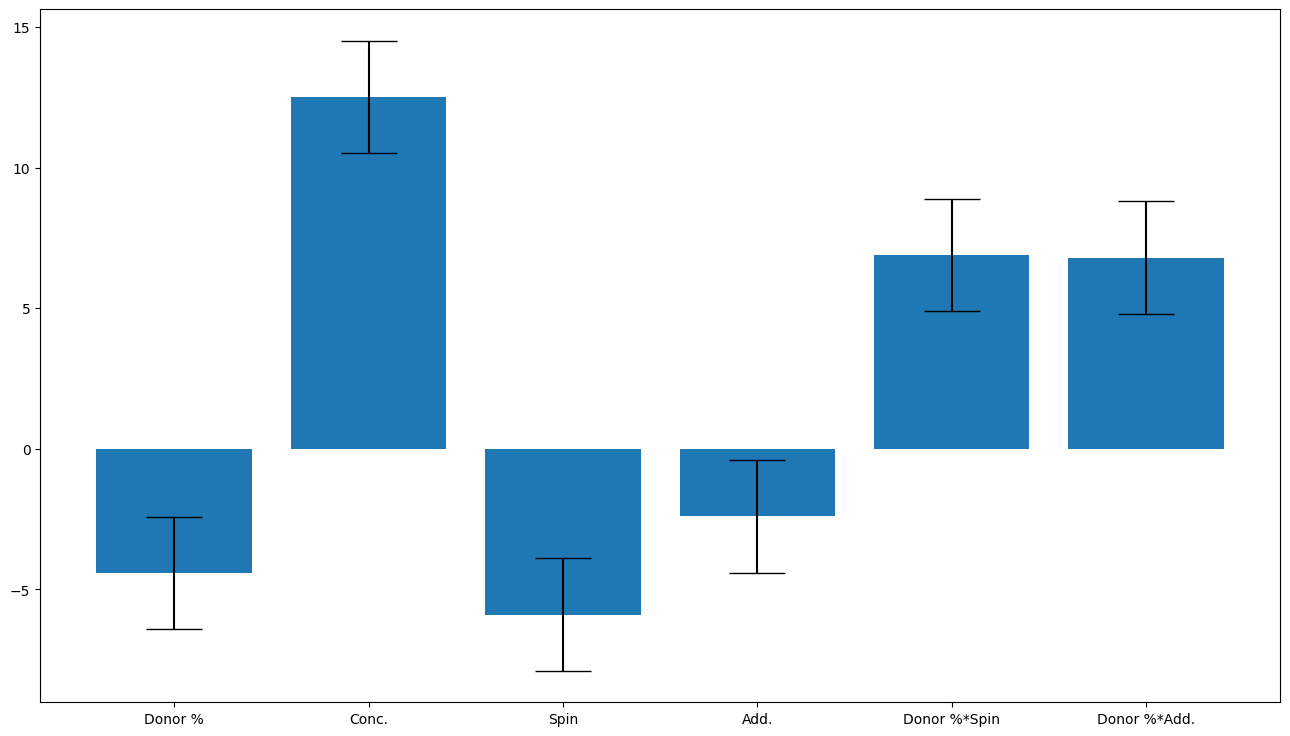

In [9]:
input_selector = [0, 1, 2, 3,
                  9, 10]
                  
dataset = doenut.data.ModifiableDataSet(sat_inputs_orig, responses).filter(input_selector).scale()

model = doenut.models.AveragedModel(dataset, scale_run_data=True, drop_duplicates="no")

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")
doenut.plot.plot_summary_of_fit_small(r2, q2)
doenut.plot.coeff_plot(model.coeffs, labels=list(dataset.get().inputs.columns), errors='p95', normalise=True)


15 terms so 14 DoF

Starting from square model

| No. of terms | DoF   | term removed | factor removed | $R^2$  |  $Q^2$ |
|--------------|-------|--------------|----------------|--------|--------|
| 10           | 4     |              |                | 0.811  |  -1.79 |
| 9            | 5     |      12      | `Conc.*Add.`   | 0.813  | 0.0863 |
| 8            | 6     |      13      | `'Spin*Add.'`  | 0.798  | -0.555 |
| 7            | 7     |      11      | `Conc*Spin.`   | 0.777  | 0.0133 |
| 6            | 8     |      8       | `Donor*Conc.`  | 0.760  | 0.310  | 

this is the model with no statistically insignificant terms. It's heirarchical. 

The Q2 is better than the main effects only model, but not as good as the square terms. 

## Task 4: Combine data from both experiments and train a parsimonious model

In [10]:
df=pd.read_csv('solar_cells_2.csv')
df

experiment # donor %  total concentration spin speed    PCE thickness  \
0           NaN     wt %               mg/mL         rpm     %        nm   
1           2-1       20                  20        1500  6.32        73   
2           2-2       27                  20        1500  7.21        77   
3           2-3       20                  25        1500  6.83       126   
4           2-4       27                  25        1500  6.96       131   
5           2-5       20                  23        1000  7.77       109   
6           2-6       27                  23        1000  6.87       136   
7           2-7       20                  23        2000  6.43        76   
8           2-8       27                  23        2000  7.65        88   
9           2-9       25                  20        1000  7.43       115   
10         2-10       25                  25        1000  6.88       135   
11         2-11       25                  20        2000  7.32       104   
12         2-12       25                  25        2000  7.21       126   
13         2-13       25                  23        1500   7.4       129   

    number of devices  
0                 NaN  
1                 5.0  
2                11.0  
3                 6.0  
4                 6.0  
5                 4.0  
6                 4.0  
7                 8.0  
8                 7.0  
9                 4.0  
10                8.0  
11                7.0  
12                8.0  
13                7.0

In [11]:
inputs_2 = pd.DataFrame({
    'Donor %': [float(x) for x in df.iloc[1:-1,1]],
    'Conc.': [float(x) for x in df.iloc[1:-1,2]],
    'Spin': [float(x) for x in df.iloc[1:-1,3]]})
inputs_2

Donor %  Conc.    Spin
0      20.0   20.0  1500.0
1      27.0   20.0  1500.0
2      20.0   25.0  1500.0
3      27.0   25.0  1500.0
4      20.0   23.0  1000.0
5      27.0   23.0  1000.0
6      20.0   23.0  2000.0
7      27.0   23.0  2000.0
8      25.0   20.0  1000.0
9      25.0   25.0  1000.0
10     25.0   20.0  2000.0
11     25.0   25.0  2000.0

In [12]:
responses_2 = pd.DataFrame({'PCE':  [float(x) for x in df['PCE'][1:-1]]})
responses_2

PCE
0   6.32
1   7.21
2   6.83
3   6.96
4   7.77
5   6.87
6   6.43
7   7.65
8   7.43
9   6.88
10  7.32
11  7.21

In [13]:
inputs[['Donor %', 'Conc.', 'Spin']]

Donor %  Conc.    Spin
0      10.0   20.0  3000.0
1      10.0   25.0  1000.0
2      10.0   10.0   600.0
3      10.0   15.0  2000.0
4      25.0   20.0   600.0
5      25.0   15.0  1000.0
6      25.0   10.0  3000.0
7      25.0   25.0  2000.0
8      40.0   10.0  1000.0
9      40.0   20.0  2000.0
10     40.0   25.0   600.0
11     40.0   15.0  3000.0
12     55.0   10.0  2000.0
13     55.0   15.0   600.0
14     55.0   20.0  1000.0

In [14]:
new_inputs = pd.concat([inputs[['Donor %', 'Conc.', 'Spin']], inputs_2], axis=0)
new_responses = pd.concat([responses, responses_2], axis=0)

In [15]:
new_inputs

Donor %  Conc.    Spin
0      10.0   20.0  3000.0
1      10.0   25.0  1000.0
2      10.0   10.0   600.0
3      10.0   15.0  2000.0
4      25.0   20.0   600.0
5      25.0   15.0  1000.0
6      25.0   10.0  3000.0
7      25.0   25.0  2000.0
8      40.0   10.0  1000.0
9      40.0   20.0  2000.0
10     40.0   25.0   600.0
11     40.0   15.0  3000.0
12     55.0   10.0  2000.0
13     55.0   15.0   600.0
14     55.0   20.0  1000.0
0      20.0   20.0  1500.0
1      27.0   20.0  1500.0
2      20.0   25.0  1500.0
3      27.0   25.0  1500.0
4      20.0   23.0  1000.0
5      27.0   23.0  1000.0
6      20.0   23.0  2000.0
7      27.0   23.0  2000.0
8      25.0   20.0  1000.0
9      25.0   25.0  1000.0
10     25.0   20.0  2000.0
11     25.0   25.0  2000.0

In [16]:
sat_source_list = []
source_list = []
sat_inputs_2, sat_source_list = doenut.add_higher_order_terms(
    new_inputs,
    add_squares=True,
    add_interactions=True,
    column_list=[])

Input array has columns ['Donor %', 'Conc.', 'Spin']
Adding square terms:
Donor %**2
Conc.**2
Spin**2
Adding interaction terms:
Donor %*Conc.
Donor %*Spin
Conc.*Spin


## Saturated model: 9 terms

Mean of test set: 4.746915925925926
Mean being used: 4.746915925925926
Sum of squares of the residuals (explained variance) is252.90176084755402
Sum of squares total (total variance) is 206.3168644580518
Q2 is -0.226
R2 is 0.8903211944304501, Q2 is -0.2257929641954879
Input_selector was: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Average coefficients are: [ 2.50008245  2.4484955   0.19604689 -5.11218527 -2.8778947  -2.48480065
 -1.28965495  0.90939463  0.78220542]
Errors are [2. 2. 2. 2. 2. 2. 2. 2. 2.]
Coefficient labels are: ['Donor %', 'Conc.', 'Spin', 'Donor %**2', 'Conc.**2', 'Spin**2', 'Donor %*Conc.', 'Donor %*Spin', 'Conc.*Spin']


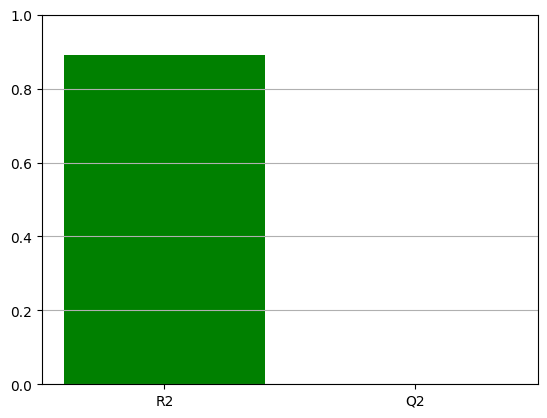

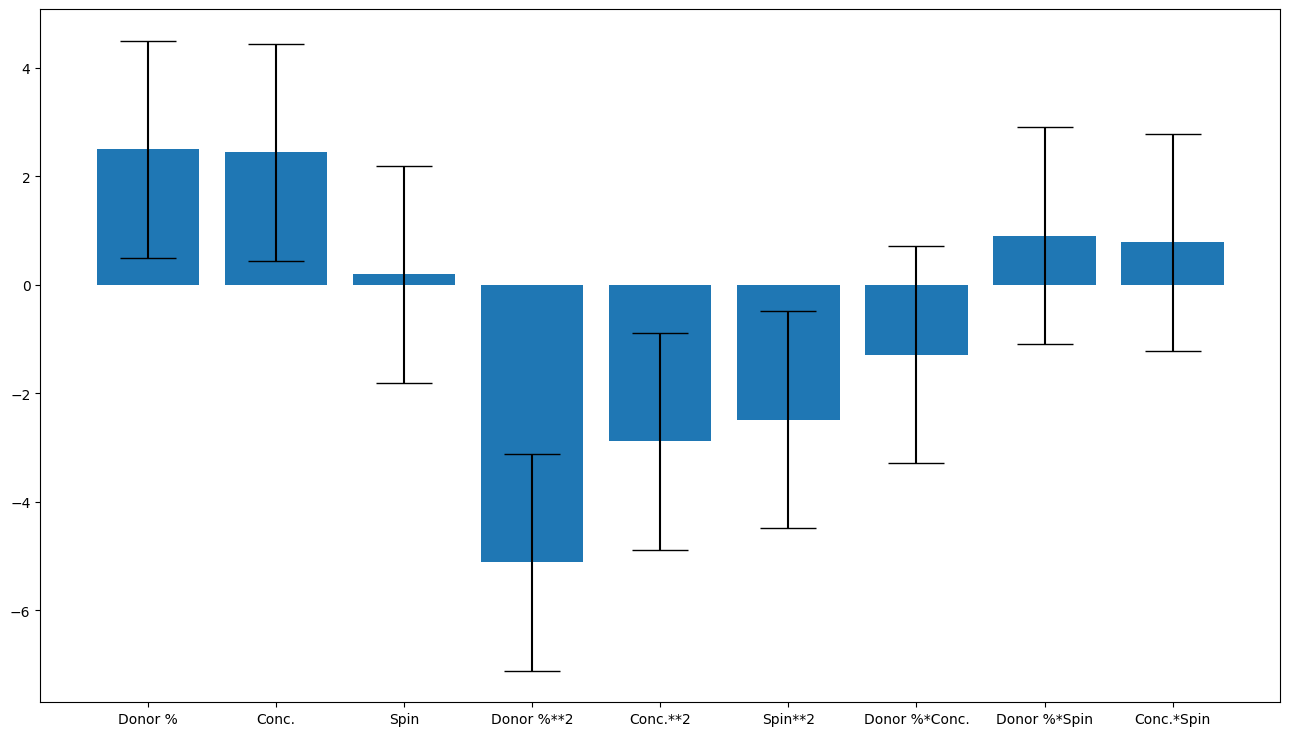

In [17]:
input_selector = [0, 1, 2,
                 3,4,5,
                 6,7,8]
                  
dataset = doenut.data.ModifiableDataSet(sat_inputs_2, new_responses).filter(input_selector)

model = doenut.models.AveragedModel(dataset, scale_data=True, drop_duplicates='no')

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")
doenut.plot.plot_summary_of_fit_small(r2, q2)
doenut.plot.coeff_plot(model.coeffs, labels=list(dataset.get().inputs.columns), errors='p95', normalise=True)

## Optimised parsimonious model

Mean of test set: 4.746915925925926
Mean being used: 4.746915925925926
Sum of squares of the residuals (explained variance) is62.93998023442558
Sum of squares total (total variance) is 206.3168644580518
Q2 is 0.695
R2 is 0.8712066982581047, Q2 is 0.6949353587756637
Input_selector was: [0, 1, 2, 3, 4, 5]
Average coefficients are: [ 13.51406635   7.52612545   4.90682899 -14.54539532  -5.32766778
  -6.36236656]
Errors are [2. 2. 2. 2. 2. 2.]
Coefficient labels are: ['Donor %', 'Conc.', 'Spin', 'Donor %**2', 'Conc.**2', 'Spin**2']


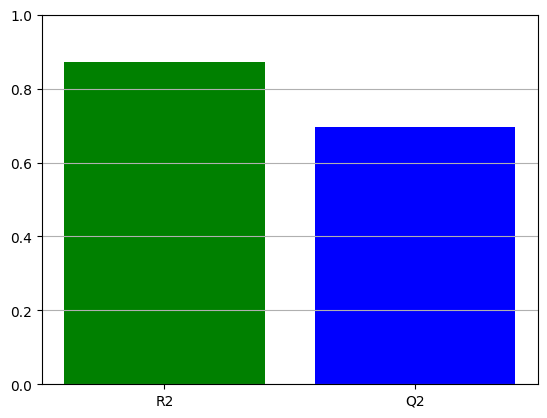

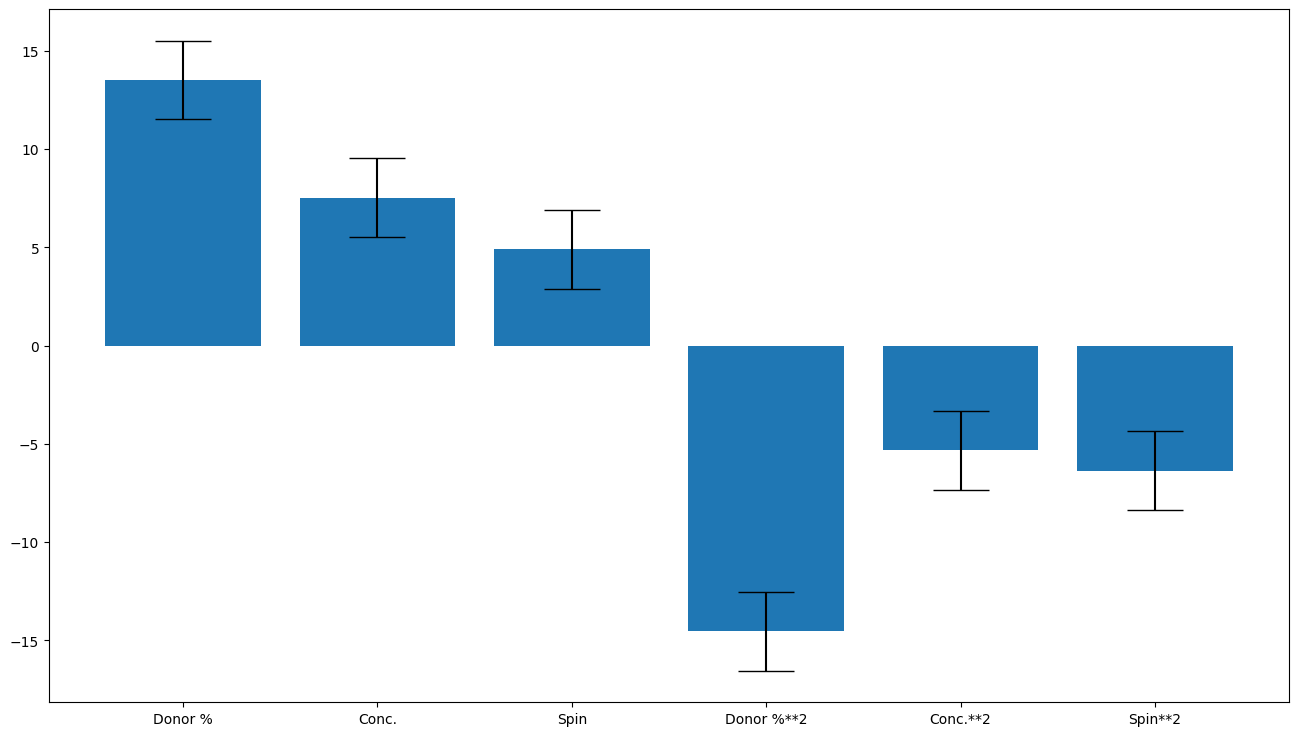

In [18]:
input_selector = [0, 1, 2,
                 3, 4, 5]
                  
dataset = doenut.data.ModifiableDataSet(sat_inputs_2, new_responses).filter(input_selector)

model = doenut.models.AveragedModel(dataset, scale_data=True, drop_duplicates='no')

r2, q2 = model.r2, model.q2

print(f"R2 is {r2}, Q2 is {q2}")
doenut.plot.plot_summary_of_fit_small(r2, q2)
doenut.plot.coeff_plot(model.coeffs, labels=list(dataset.get().inputs.columns), errors='p95', normalise=True)

In [19]:
27-1-9

17


| No. of terms | DoF   | term removed | factor removed | $R^2$  |  $Q^2$ |
|--------------|-------|--------------|----------------|--------|--------|
| 9            |   17  |              |                | 0.89   | -0.425 |
| 8            |   18  |    8         | `Conc.*Spin`   | 0.887. | 0.44   |
| 7            |   19  |    7         | `Donor*Spin`   | 0.88   | 0.535  |
| 6            |   20  |    6         | `Donor* Conc`  | 0.871  | 0.695  | 

## Task 5: Optimising the devices. Using the best model that you have trained (as measured by Q2), find some conditions to optimise the devices. 

### Task 5. Method 1: Plot a 4-D contour plot and read the values off:

<Figure size 2000x1200 with 0 Axes>

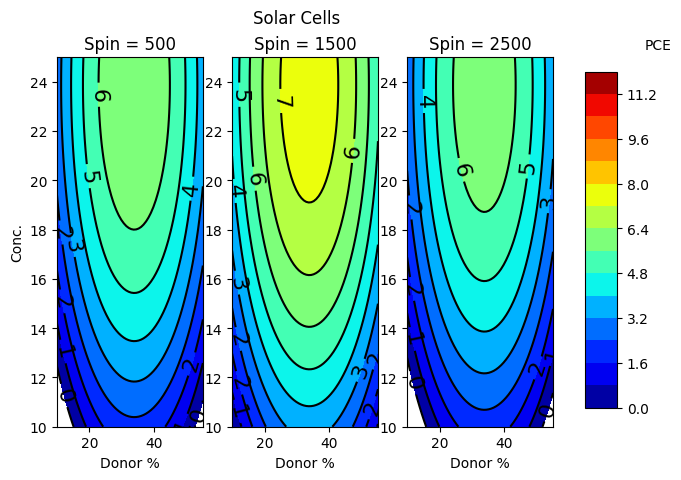

In [20]:
#'Donor %', 'Conc.', 'Spin'

n_points = 60


def my_function(df_1):
    ## Put the two main factors that you're not plotting here
    ## set them to sensible constant values

    df_1['Donor %**2'] = df_1['Donor %']*df_1['Donor %']
    df_1['Conc.**2'] = df_1['Conc.']*df_1['Conc.']
    df_1['Spin**2'] = df_1['Spin'] * df_1['Spin']
    
    return df_1



c_key ='Spin'
y_key='Conc.'
x_key="Donor %"

doenut.plot.four_D_contour_plot(
    unscaled_model=model.model,
    x_key=x_key,
    y_key=y_key,
    c_key=c_key,
    x_limits=[inputs[x_key].min(),inputs[x_key].max()], 
    y_limits=[inputs[y_key].min(),inputs[y_key].max()], 
    constants=[500,1500,2500], 
    n_points=60,
    my_function=my_function,
    input_selector=[],
    fig_label='Solar Cells',    
    x_label=x_key,
    y_label=y_key,
    constant_label=c_key,
    z_label = 'PCE',
    cmap='jet',
    num_of_z_levels=16,
    z_limits=[0,12])

### Task 5. Method 2. Run the model on the input values: 

In [21]:
question_5p2=pd.DataFrame({'A':{'Donor %': 20, 'Conc.': 12, 'Spin':  500},
 'B':{'Donor %': 40, 'Conc.': 16, 'Spin':  1500},
 'C':{'Donor %': 35, 'Conc.': 22, 'Spin':  1500},
 'D':{'Donor %': 45, 'Conc.': 18, 'Spin':  2500},
 'E':{'Donor %': 20, 'Conc.': 17, 'Spin':  2500}}).T

In [22]:
question_5p2

Donor %  Conc.  Spin
A       20     12   500
B       40     16  1500
C       35     22  1500
D       45     18  2500
E       20     17  2500

In [23]:
question_5p2.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [24]:
sat_source_list = []
source_list = []
sat_inputs_q5, sat_source_list = doenut.add_higher_order_terms(
    question_5p2,
    add_squares=True,
    add_interactions=True,
    column_list=[],
    verbose=False)

results, _ =doenut.predict_from_model(
    model.model,
    sat_inputs_q5,
    input_selector)
letters = [x for x in question_5p2.index]
[print(f"{letters[i]}:\t{results[i]}") for i in range(len(letters))];

A:	[2.10529444]
B:	[6.11116764]
C:	[7.61049529]
D:	[4.653001]
E:	[3.96951755]


Answer C is above 7.